**data & label 資料位置**

- https://drive.google.com/file/d/1a7IPxCNENdIj_UmU0qM-nl3-WRwkMa_6/view?usp=sharing
- https://drive.google.com/file/d/1oNj8b-rnJiYcAKRKMxu4kGCow-mELTkG/view?usp=sharing


In [1]:
#@title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#@title 從Google Drive 匯入 data & label 資料
train_data_path = '/content/drive/MyDrive/aidataset/lstm_40fpv_data.npy' #@param {type:"string"}
train_label_path =  '/content/drive/MyDrive/aidataset/lstm_40fpv_labels.npy' #@param {type:"string"}
cmd  = f'cp {train_data_path} ./lstm_data.npy'
! $cmd
cmd  = f'cp {train_label_path} ./lstm_labels.npy'
! $cmd

In [23]:
#@title 載入 rnn 模型函數
def rnn_models(model_name, train_data):
    main_input = Input(
        shape=(train_data.shape[1],
               train_data.shape[2]),
        name="main_input"
    )   

    if model_name == "lstm":
        headModel = LSTM(32)(main_input)

    elif model_name == "bidirectional":
        headModel = Bidirectional(LSTM(256, return_sequences=True))(main_input)
        headModel = LSTM(32)(headModel)

    predictions = Dense(
        2,
        activation="softmax",
        kernel_initializer="he_uniform"
    )(headModel)
    model = Model(inputs=main_input, outputs=predictions)

    # Model compilation
    # opt = SGD(lr=1e-4, momentum=0.9, decay=1e-4 / EPOCHS)
    optimizer = Nadam(
        lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004
    )
    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )

    return model

In [24]:
#@title 建立 rnn 模型
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Dense
from keras.models import Model
import numpy as np
import imageio.core.util
from PIL import Image
import cv2
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.layers import Input, LSTM, Bidirectional
from random import shuffle
from os import listdir
import glob
from os.path import join
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
# Training dataset loading
train_data = np.load("lstm_data.npy")
train_label = np.load("lstm_labels.npy")
train_label = utils.to_categorical(train_label)
print("Dataset Loaded...")

# Train validation split
trainX, valX, trainY, valY = train_test_split(
    train_data, train_label, shuffle=True, test_size=0.1
)

model_choice = 'lstm' #@param ["lstm", "bidirectional"]
model = rnn_models(model_choice,train_data)

trainable_count = int(
    np.sum([K.count_params(p) for p in set(model.trainable_weights)])
)
non_trainable_count = int(
    np.sum([K.count_params(p) for p in set(model.non_trainable_weights)])
)

# Number of trainable and non-trainable parameters
print("Total params: {:,}".format(trainable_count + non_trainable_count))
print("Trainable params: {:,}".format(trainable_count))
print("Non-trainable params: {:,}".format(non_trainable_count))



Dataset Loaded...
Total params: 69,826
Trainable params: 69,826
Non-trainable params: 0


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


In [25]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 main_input (InputLayer)     [(None, 25, 512)]         0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                69760     
                                                                 
 dense_6 (Dense)             (None, 2)                 66        
                                                                 
Total params: 69,826
Trainable params: 69,826
Non-trainable params: 0
_________________________________________________________________


In [26]:
#@title 模型訓練 
epoch_num =  10 #@param {type:"integer"}
H = model.fit(
    trainX,
    trainY,
    validation_data=(valX, valY),
    batch_size=32,
    epochs=epoch_num,
    shuffle=True
)


Train on 148 samples, validate on 17 samples
Epoch 1/10
128/148 [========================>.....] - ETA: 0s - loss: 0.3838 - accuracy: 0.7656

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


148/148 [==============================] - 3s 19ms/sample - loss: 0.3404 - accuracy: 0.7973 - val_loss: 0.1042 - val_accuracy: 1.0000
Epoch 2/10
148/148 [==============================] - 0s 2ms/sample - loss: 0.0465 - accuracy: 1.0000 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 3/10
148/148 [==============================] - 0s 2ms/sample - loss: 0.0209 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 1.0000
Epoch 4/10
148/148 [==============================] - 0s 2ms/sample - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 5/10
148/148 [==============================] - 0s 2ms/sample - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 6/10
148/148 [==============================] - 0s 2ms/sample - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 7/10
148/148 [==============================] - 0s 2ms/sample - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Ep

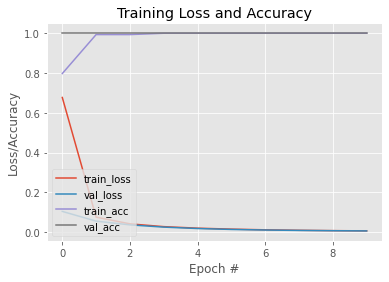

In [7]:
#@title 繪製訓練損失與準確率變化
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.figure()
N = len(H.history["loss"])
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [8]:
#@title 安裝facenet_pytorch
! pip install facenet_pytorch

     |████████████████████████████████| 1.9 MB 5.2 MB/s 


In [9]:
#@title 從Google Drive 匯入影片資料
train_data_path = '/content/drive/MyDrive/aidataset/df_train.zip' #@param {type:"string"}
cmd  = f'cp {train_data_path} ./df_train.zip'
! $cmd
! unzip df_train.zip

Archive:  df_train.zip
   creating: train/0/
   creating: train/1/
  inflating: train/0/id1_0002.mp4    
  inflating: train/0/id3_0005.mp4    
  inflating: train/0/id4_0007.mp4    
  inflating: train/0/id4_0009.mp4    
  inflating: train/0/id4_0008.mp4    
  inflating: train/0/id0_0000.mp4    
  inflating: train/0/id2_0004.mp4    
  inflating: train/0/id3_0003.mp4    
  inflating: train/0/id4_0005.mp4    
  inflating: train/0/id1_0005.mp4    
  inflating: train/0/id3_0000.mp4    
  inflating: train/0/id2_0005.mp4    
  inflating: train/0/id0_0009.mp4    
  inflating: train/0/id3_0007.mp4    
  inflating: train/0/id1_0003.mp4    
  inflating: train/0/id4_0003.mp4    
  inflating: train/0/id0_0006.mp4    
  inflating: train/0/id3_0008.mp4    
  inflating: train/0/id0_0002.mp4    
  inflating: train/0/id1_0008.mp4    
  inflating: train/0/id0_0003.mp4    
  inflating: train/0/id3_0006.mp4    
  inflating: train/0/id4_0000.mp4    
  inflating: train/0/id3_0002.mp4    
  inflating: train/0/

In [10]:
#@title 將新影片放入newvideo
! mkdir -p newvideo
! cp /content/train/1/id0_id3_0003.mp4 newvideo/

In [12]:
#@title 載入 CNN 模型
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import CSVLogger
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.nasnet import NASNetLarge
from matplotlib import pyplot as plt
from tensorflow.keras import backend as K
import numpy as np
import time
import argparse
from os.path import exists
from os import makedirs
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

def cnn_model(model_name, img_size, weights):
    """
    Model definition using Xception net architecture
    """
    input_size = (img_size, img_size, 3)
    if model_name == "xception":
        baseModel = Xception(
            weights="imagenet",
            include_top=False,
            input_shape=(img_size, img_size, 3)
        )
    elif model_name == "iv3":
        baseModel = InceptionV3(
            weights="imagenet",
            include_top=False,
            input_shape=(img_size, img_size, 3)
        )
    elif model_name == "irv2":
        baseModel = InceptionResNetV2(
            weights="imagenet",
            include_top=False,
            input_shape=(img_size, img_size, 3)
        )
    elif model_name == "resnet":
        baseModel = ResNet50(
            weights="imagenet",
            include_top=False,
            input_shape=(img_size, img_size, 3)
        )


    headModel = baseModel.output
    headModel = GlobalAveragePooling2D()(headModel)
    headModel = Dense(512, activation="relu", kernel_initializer="he_uniform", name="fc1")(
        headModel
    )
    headModel = Dropout(0.4)(headModel)

    predictions = Dense(
        2,
        activation="softmax",
        kernel_initializer="he_uniform")(
        headModel
    )
    model = Model(inputs=baseModel.input, outputs=predictions)

    model.load_weights(weights + ".hdf5")
    print("Weights loaded...")
    model_lstm = Model(
        inputs=baseModel.input,
        outputs=model.get_layer("fc1").output
    )

    for layer in baseModel.layers:
        layer.trainable = True

    optimizer = Nadam(
        lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004
    )
    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )
    return model_lstm


In [13]:
#@title 從Google Drive 匯入CNN Weights資料
train_data_path = '/content/drive/MyDrive/aidataset/cnn_weights.hdf5' #@param {type:"string"}
cmd  = f'cp {train_data_path} ./cnn_weights.hdf5'
! $cmd


In [20]:
#@title 取得新影片的lstm feature

import cv2
from PIL import Image
#@title 利用CNN 擷取影片特徵
from facenet_pytorch import MTCNN
from os import listdir
from os.path import join
from glob import glob


mtcnn = MTCNN(
    margin=40,
    select_largest=False,
    post_process=False,
    device="cuda:0"
)

train_dir = "newvideo/"
sub_directories = listdir(train_dir)

videos = []
videos += glob(join(train_dir, "*.mp4"))

print(videos)
model_choice = 'xception' #@param ["xception", "iv3", "irv2", "resnet"]
# Loading model for feature extraction
model2 = cnn_model(
    model_name=model_choice,
    img_size=160, 
    weights = 'cnn_weights'
)
features = []
counter = 0
labels = []

for video in videos:
    cap = cv2.VideoCapture(video)
    #labels += [int(video.split("/")[-2])]

    batches = []

    while cap.isOpened() and len(batches) < 25:
        ret, frame = cap.read()
        if not ret:
            break

        h, w, _ = frame.shape
        if h >= 1080 and w >= 1920:
            frame = cv2.resize(
                frame,
                (640, 480),
                interpolation=cv2.INTER_AREA
            )

        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = Image.fromarray(frame)
        face = mtcnn(frame)

        try:
            face = face.permute(1, 2, 0).int().numpy()
            batches.append(face)
        except AttributeError:
            print("Image Skipping")

    cap.release()
    batches = np.array(batches).astype("float32")
    batches /= 255

    # fc layer feature generation
    predictions = model2.predict(batches)

    features += [predictions]

    if counter % 50 == 0:
        print("Number of videos done:", counter)
    counter += 1

features = np.array(features)


['newvideo/id0_id3_0003.mp4']
Weights loaded...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Number of videos done: 0


In [29]:
#@title 產生預測結果
import numpy as np
np.argmax(model.predict(features))

1